In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.drop(['RowNumber','CustomerId','Surname'],axis= 1, inplace = True)

In [4]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


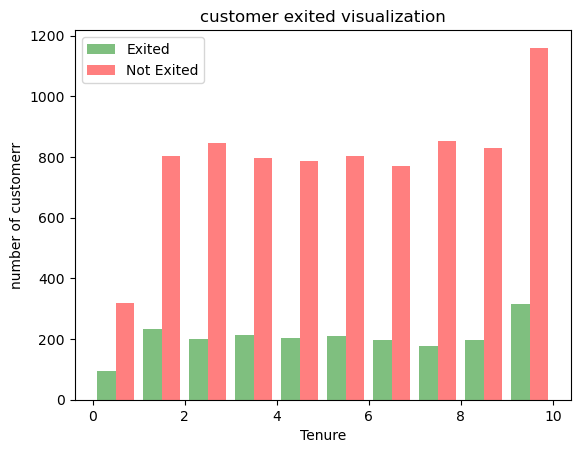

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
t_y = df[df.Exited == 1].Tenure
t_n = df[df.Exited == 0].Tenure
plt.hist([t_y,t_n], alpha=0.5, label=['Exited','Not Exited'],color = ['g','r'])
plt.xlabel('Tenure')
plt.ylabel('number of customerr')
plt.title('customer exited visualization')
plt.legend()

In [7]:
t_n

1        1
3        1
4        2
6        7
8        4
        ..
9993     7
9994     2
9995     5
9996    10
9999     4
Name: Tenure, Length: 7963, dtype: int64

In [8]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.dtypes


CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
column = ['Geography', 'Gender', 'Age', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Exited']
for col in column:
    print(f'{col} : {df[col].unique()}')

Geography : ['France' 'Spain' 'Germany']
Gender : [1 0]
Age : [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
Tenure : [ 2  1  8  7  4  6  3 10  5  9  0]
NumOfProducts : [1 3 2 4]
HasCrCard : [1 0]
IsActiveMember : [1 0]
Exited : [1 0]


In [11]:
df1 = pd.get_dummies(df,columns = ['Geography','NumOfProducts'])

In [12]:
df1

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,1,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,1,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,1,42,8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,1,39,1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,1,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,1,0,96270.64,0,1,0,0,0,1,0,0
9996,516,0,35,10,57369.61,1,1,101699.77,0,1,0,0,1,0,0,0
9997,709,1,36,7,0.00,0,1,42085.58,1,1,0,0,1,0,0,0
9998,772,0,42,3,75075.31,1,0,92888.52,1,0,1,0,0,1,0,0


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
col_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary']
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [15]:
df1[col_to_scale] 

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,0.538,0.324324,0.2,0.000000,0.506735
1,0.516,0.310811,0.1,0.334031,0.562709
2,0.304,0.324324,0.8,0.636357,0.569654
3,0.698,0.283784,0.1,0.000000,0.469120
4,1.000,0.337838,0.2,0.500246,0.395400
...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.481341
9996,0.332,0.229730,1.0,0.228657,0.508490
9997,0.718,0.243243,0.7,0.000000,0.210390
9998,0.844,0.324324,0.3,0.299226,0.464429


In [16]:
df1.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
NumOfProducts_1        uint8
NumOfProducts_2        uint8
NumOfProducts_3        uint8
NumOfProducts_4        uint8
dtype: object

In [17]:
df1

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,1,0.324324,0.2,0.000000,1,1,0.506735,1,1,0,0,1,0,0,0
1,0.516,1,0.310811,0.1,0.334031,0,1,0.562709,0,0,0,1,1,0,0,0
2,0.304,1,0.324324,0.8,0.636357,1,0,0.569654,1,1,0,0,0,0,1,0
3,0.698,1,0.283784,0.1,0.000000,0,0,0.469120,0,1,0,0,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,1,1,0.395400,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,1,0,0.481341,0,1,0,0,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,1,1,0.508490,0,1,0,0,1,0,0,0
9997,0.718,1,0.243243,0.7,0.000000,0,1,0.210390,1,1,0,0,1,0,0,0
9998,0.844,0,0.324324,0.3,0.299226,1,0,0.464429,1,0,1,0,0,1,0,0


In [18]:
X = df1.drop(['Exited'], axis = 1)
y = df1.Exited

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (15,), activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy']
             )
model.fit(X_train,y_train,epochs=50)

In [21]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.3767 - accuracy: 0.8410


[0.3766680359840393, 0.8410000205039978]

In [22]:
model.predict(X_train)

250/250 [==============================] - 1s 3ms/step


array([[0.08289053],
       [0.03738322],
       [0.7124327 ],
       ...,
       [0.24607092],
       [0.07136323],
       [0.8263931 ]], dtype=float32)

In [23]:
y_pred = []
for i in model.predict(X_test):
    if i < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)
y_pred[:10]        

63/63 [==============================] - 0s 3ms/step


[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [24]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90      1595
           1       0.67      0.43      0.52       405

    accuracy                           0.84      2000
   macro avg       0.77      0.69      0.71      2000
weighted avg       0.83      0.84      0.83      2000



In [26]:
import seaborn as sn

In [27]:
cm = tf.math.confusion_matrix(y_test,y_pred)

<Axes: >

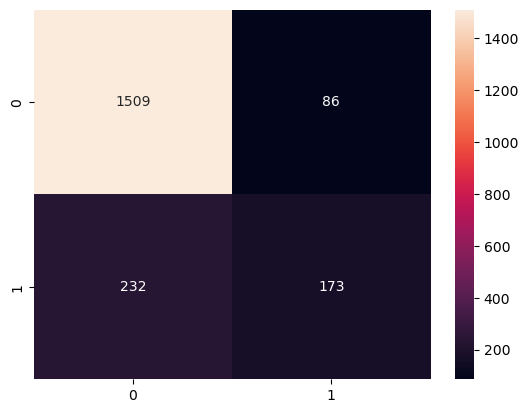

In [28]:
sn.heatmap(cm,annot = True, fmt = 'd')

In [29]:
1530/(1530+239)

0.8648954211418881

In [30]:
1530/(1530+65)

0.9592476489028213

In [31]:
166/(166+65)

0.7186147186147186

In [32]:
166/(166+239)

0.40987654320987654

In [33]:
2*((0.86*0.95)/(0.86+0.95))

0.9027624309392265

In [35]:
class_0 , class_1 = df1.Exited.value_counts()

In [38]:
df_c0 = df1[df1.Exited == 0]
df_c1 = df1[df1.Exited== 1]


In [47]:
def ANN(X,y,epoch):    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
    model = keras.Sequential([
        keras.layers.Dense(10,input_shape = (15,), activation = 'relu'),
        keras.layers.Dense(1,activation = 'sigmoid')
    ])
    model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy']
                 )
    model.fit(X_train,y_train,epochs=epoch)
    y_pred = []
    for i in model.predict(X_test):
        if i < 0.5:
            y_pred.append(0)
        else:
            y_pred.append(1)
    print(classification_report(y_test,y_pred))

# under sampling

In [41]:
df_0_under = df_c0.sample(class_1) 

In [43]:
df_under = pd.concat([df_0_under,df_c1], axis = 0)

In [45]:
x_under = df_under.drop(['Exited'],axis = 1)
y_under = df_under.Exited

In [48]:
ANN(x_under,y_under,50)

Epoch 1/50
102/102 [==============================] - 2s 4ms/step - loss: 0.6921 - accuracy: 0.5640
Epoch 2/50
102/102 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.6266
Epoch 3/50
102/102 [==============================] - 0s 3ms/step - loss: 0.6082 - accuracy: 0.6843
Epoch 4/50
102/102 [==============================] - 0s 4ms/step - loss: 0.5712 - accuracy: 0.7208
Epoch 5/50
102/102 [==============================] - 0s 4ms/step - loss: 0.5510 - accuracy: 0.7272
Epoch 6/50
102/102 [==============================] - 0s 4ms/step - loss: 0.5398 - accuracy: 0.7300
Epoch 7/50
102/102 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7343
Epoch 8/50
102/102 [==============================] - 0s 4ms/step - loss: 0.5256 - accuracy: 0.7389
Epoch 9/50
102/102 [==============================] - 0s 4ms/step - loss: 0.5213 - accuracy: 0.7407
Epoch 10/50
102/102 [==============================] - 0s 4ms/step - loss: 0.5186 - accuracy: 0.7426

# over sampling (duplication)

In [50]:
df_1_over = df_c1.sample(class_0, replace = True)

In [52]:
df_over = pd.concat([df_1_over,df_c0], axis = 0)

In [54]:
x_over = df_over.drop(['Exited'],axis = 1)
y_over = df_over.Exited

In [55]:
ANN(x_over,y_over,50)

Epoch 1/50
399/399 [==============================] - 3s 4ms/step - loss: 0.6226 - accuracy: 0.6692
Epoch 2/50
399/399 [==============================] - 1s 4ms/step - loss: 0.5396 - accuracy: 0.7352
Epoch 3/50
399/399 [==============================] - 2s 4ms/step - loss: 0.5154 - accuracy: 0.7473
Epoch 4/50
399/399 [==============================] - 1s 4ms/step - loss: 0.5031 - accuracy: 0.7519
Epoch 5/50
399/399 [==============================] - 1s 4ms/step - loss: 0.4948 - accuracy: 0.7528
Epoch 6/50
399/399 [==============================] - 2s 4ms/step - loss: 0.4900 - accuracy: 0.7565
Epoch 7/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4867 - accuracy: 0.7580
Epoch 8/50
399/399 [==============================] - 1s 4ms/step - loss: 0.4839 - accuracy: 0.7607
Epoch 9/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4817 - accuracy: 0.7618
Epoch 10/50
399/399 [==============================] - 1s 4ms/step - loss: 0.4799 - accuracy: 0.7619